In [2]:
# Step 1: Understand the Dataset
import pandas as pd



# Load the data of articles
# Load the CSV file
df_new = pd.read_csv('data/vaccination_synthetic_articles_combined.csv')

# Create a DataFrame for original and changed articles
df_original = df_new[['Original_article']].dropna().copy()
df_original['text'] = df_original['Original_article']
df_original['target'] = 1

df_changed = df_new[['Changed_article']].dropna().copy()
df_changed['text'] = df_changed['Changed_article']
df_changed['target'] = 0

# Combine into df_train
data = pd.concat([df_original[['text', 'target']], df_changed[['text', 'target']]], ignore_index=True)
print(data.head())
print(data.shape)

# Load the data of tweets
# Load the CSV file
df_tweets_new = pd.read_csv('data/generation_vaccination_all_tweets_combined.csv')

# Create a DataFrame for original and changed articles
df_tweets_original = df_tweets_new[['Original_article']].dropna().copy()
df_tweets_original['text'] = df_tweets_original['Original_article']
df_tweets_original['target'] = 1

df_tweets_changed = df_tweets_new[['Changed_article']].dropna().copy()
df_tweets_changed['text'] = df_tweets_changed['Changed_article']
df_tweets_changed['target'] = 0

# Combine into df_train
data_tweets = pd.concat([df_tweets_original[['text', 'target']], df_tweets_changed[['text', 'target']]], ignore_index=True)
print(data_tweets.head())
print(data_tweets.shape)

# Step 2: Clean the Text
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Lowercase the text
data['text'] = data['text'].str.lower()

# Remove punctuation and special characters
data['text'] = data['text'].str.replace(f"[{string.punctuation}]", "", regex=True)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

# Tokenize and lemmatize
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))




                                                text  target
0  Article courtesy of Kenneth Kwok Co-President ...       1
1  The FDA has quickly given the OK to the second...       1
2  Tesla will temporarily shut down its car manuf...       1
3  USA TODAY\n\nAs the novel coronavirus spreads ...       1
4  Is it safe for me to go outside?\n\nFor most p...       1
(677, 2)
                                                text  target
0  Explain to me again why we need a vaccine @Bor...       1
1  Same folks said daikon paste could treat a cyt...       1
2  Facts are immutable, Senator, even when you're...       1
3  While the world has been on the wrong side of ...       1
4  #coronavirus #SputnikV #AstraZeneca #PfizerBio...       1
(962, 2)


        word_count  unique_word_count
count   677.000000         677.000000
mean    355.277696         234.812408
std     331.119622         181.491924
min       0.000000           0.000000
25%     190.000000         134.000000
50%     263.000000         186.000000
75%     369.000000         253.000000
max    2464.000000        1529.000000
[('said', 1886), ('coronavirus', 1669), ('people', 1533), ('health', 1409), ('covid19', 1378), ('virus', 1167), ('new', 1115), ('state', 1079), ('—', 966), ('may', 933)]


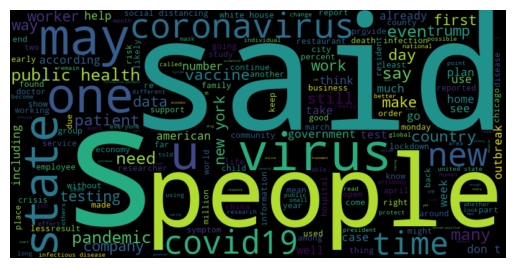

In [3]:
# Step 3: Exploratory Data Analysis
# Basic statistics
data['word_count'] = data['text'].apply(lambda x: len(x.split()))
data['unique_word_count'] = data['text'].apply(lambda x: len(set(x.split())))
print(data[['word_count', 'unique_word_count']].describe())

# Most frequent words
from collections import Counter
word_counts = Counter(" ".join(data['text']).split())
print(word_counts.most_common(10))

# Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(data['text'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




In [4]:
# Step 5: Feature Engineering
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['text'])

# Word Embeddings
from gensim.models import Word2Vec
model = Word2Vec(sentences=data['text'].apply(str.split).tolist(), vector_size=100, window=5, min_count=1, workers=4)

# Step 6: Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['target'], test_size=0.2, random_state=42)

# Step 7: Prepare for Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.50      0.47        60
           1       0.57      0.51      0.54        76

    accuracy                           0.51       136
   macro avg       0.51      0.51      0.51       136
weighted avg       0.51      0.51      0.51       136



Missing values per column:
text                 0
target               0
word_count           0
unique_word_count    0
label                0
dtype: int64

Class distribution:
label
1    339
0    338
Name: count, dtype: int64


C:\Users\Lukag\AppData\Local\Temp\ipykernel_9912\2742506820.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='coolwarm')


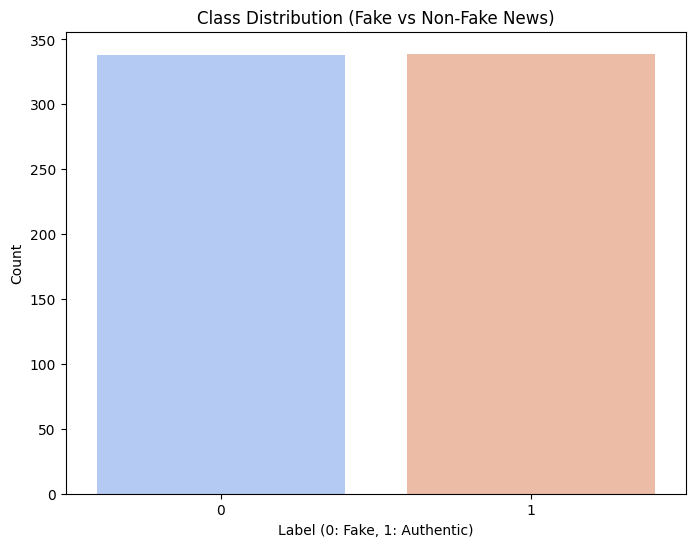


Text length statistics:
count      677.000000
mean      2615.992614
std       2367.267860
min          0.000000
25%       1429.000000
50%       1949.000000
75%       2743.000000
max      17476.000000
Name: text_length, dtype: float64


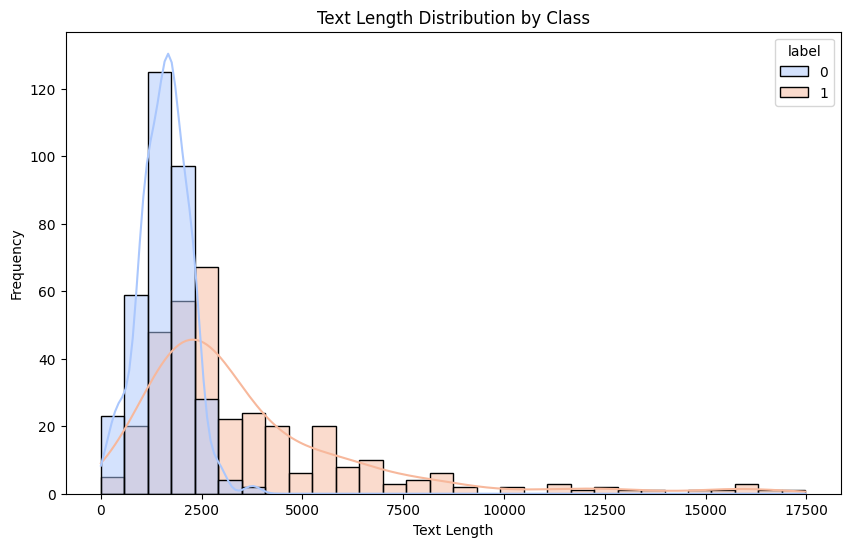

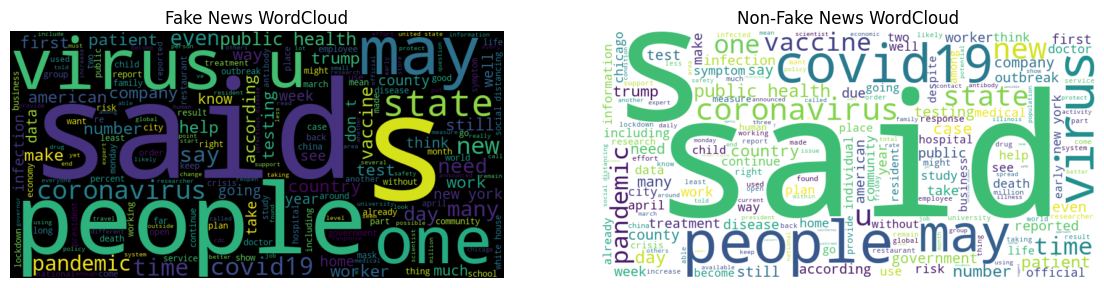

C:\Users\Lukag\AppData\Local\Temp\ipykernel_9912\2742506820.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fake_words.sort_values('count', ascending=False), x='count', y='word', palette='Reds_r')
C:\Users\Lukag\AppData\Local\Temp\ipykernel_9912\2742506820.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_fake_words.sort_values('count', ascending=False), x='count', y='word', palette='Blues_r')


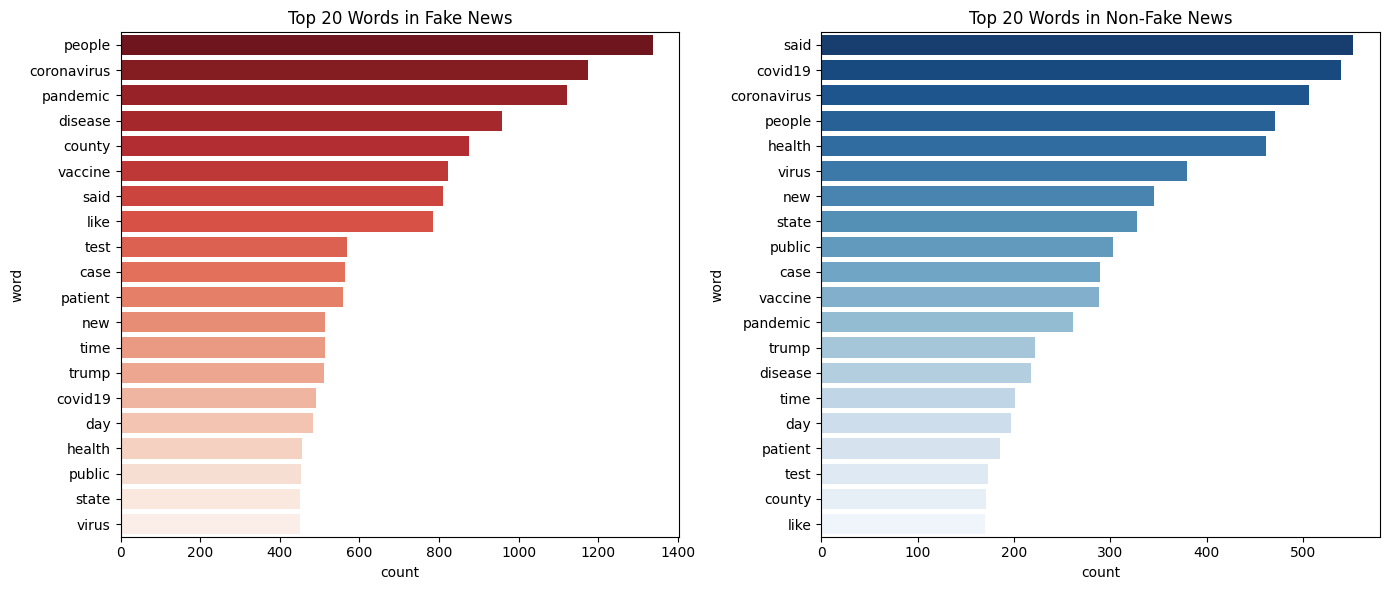

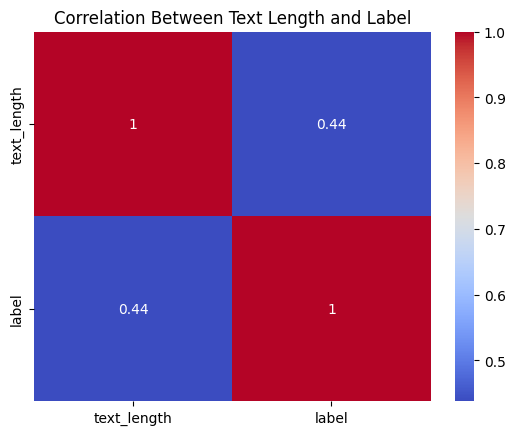

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset (replace 'your_dataset.csv' with your file)
df = data
df['label'] = df['target']

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check class distribution
print("\nClass distribution:")
print(df['label'].value_counts())

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', palette='coolwarm')
plt.title('Class Distribution (Fake vs Non-Fake News)')
plt.xlabel('Label (0: Fake, 1: Authentic)')
plt.ylabel('Count')
plt.show()

# Analyze text lengths
df['text_length'] = df['text'].apply(len)
print("\nText length statistics:")
print(df['text_length'].describe())

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True, palette='coolwarm')
plt.title('Text Length Distribution by Class')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Generate word clouds for each class
fake_news_text = ' '.join(df[df['label'] == 1]['text'])
non_fake_news_text = ' '.join(df[df['label'] == 0]['text'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_news_text)
wordcloud_non_fake = WordCloud(width=800, height=400, background_color='white').generate(non_fake_news_text)

# Display word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_fake, interpolation='bilinear')
plt.title('Non-Fake News WordCloud')
plt.axis('off')
plt.show()

# Most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X_fake = vectorizer.fit_transform(df[df['label'] == 1]['text'])
X_non_fake = vectorizer.fit_transform(df[df['label'] == 0]['text'])

fake_words = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X_fake.toarray().sum(axis=0)})
non_fake_words = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X_non_fake.toarray().sum(axis=0)})

# Bar plots for frequent words
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=fake_words.sort_values('count', ascending=False), x='count', y='word', palette='Reds_r')
plt.title('Top 20 Words in Fake News')

plt.subplot(1, 2, 2)
sns.barplot(data=non_fake_words.sort_values('count', ascending=False), x='count', y='word', palette='Blues_r')
plt.title('Top 20 Words in Non-Fake News')
plt.tight_layout()
plt.show()

# Correlation analysis
# Example: Convert labels to numeric if not already
df['label'] = pd.to_numeric(df['label'], errors='coerce')

# Correlation with text length
corr = df[['text_length', 'label']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Text Length and Label')
plt.show()


C:\Users\Lukag\AppData\Local\Temp\ipykernel_9912\1708882900.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Class', loc='upper right')


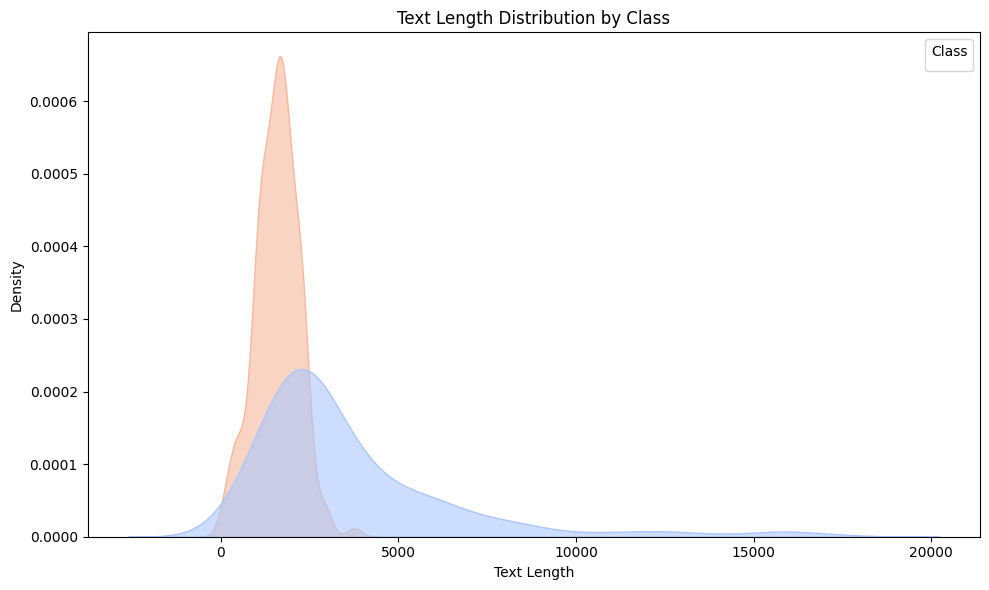

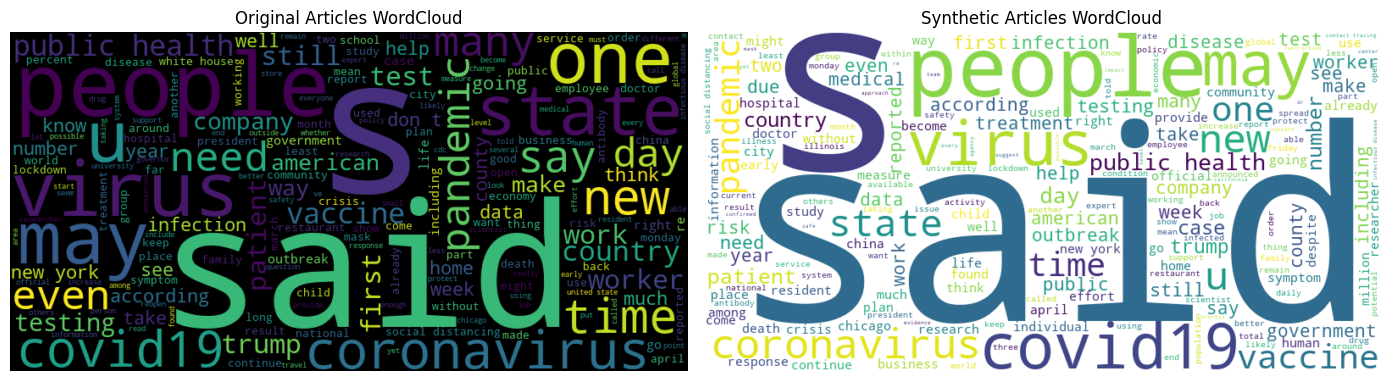

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Rename labels
df['label'] = df['label'].replace({1: 'Original Articles', 0: 'Synthetic Articles'})

# Remove histogram bars and plot KDE for text length
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='text_length', hue='label', fill=True, common_norm=False, palette='coolwarm', alpha=0.6)
plt.title('Text Length Distribution by Class')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.savefig('text_length_distribution.png')  # Save the plot

# Generate word clouds
original_articles_text = ' '.join(df[df['label'] == 'Original Articles']['text'])
synthetic_articles_text = ' '.join(df[df['label'] == 'Synthetic Articles']['text'])

wordcloud_original = WordCloud(width=800, height=400, background_color='black').generate(original_articles_text)
wordcloud_synthetic = WordCloud(width=800, height=400, background_color='white').generate(synthetic_articles_text)

# Save word clouds
wordcloud_original.to_file('original_articles_wordcloud.png')
wordcloud_synthetic.to_file('synthetic_articles_wordcloud.png')

# Display word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.title('Original Articles WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_synthetic, interpolation='bilinear')
plt.title('Synthetic Articles WordCloud')
plt.axis('off')
plt.tight_layout()
plt.show()